# Problem 1

Needed imports


In [ ]:
# Needed imports
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
from sklearn.neighbors import KNeighborsClassifier


Preprocesing data and preparations for the algorithm

In [ ]:
# Preprocessing data and preparations for the algorithm
mnist = fetch_openml('mnist_784')
x, y = mnist.data / 255, mnist.target
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.9, random_state=42)
#x_train = x_train.to_numpy()
#y_train = y_train.to_numpy()
#x_test = x_test.to_numpy()
#y_test = y_test.to_numpy()
iterations = [1, 2, 11] # long calculations for 22, 44 and 88
results = {}   

In [28]:

# Algorithm itself
for k in range(1, 11):
  results[k] = []
  for i in iterations:
    accuracies = []
    for j in range(i):
      x_train_resampled, y_train_resampled = resample(x_train, y_train, replace=True)
      knn = KNeighborsClassifier(n_neighbors=k)
      knn.fit(x_train_resampled, y_train_resampled)
      mask = ~x_train.index.isin(x_train_resampled.index)
      x_oob = x_train[mask]
      y_oob = y_train[mask]
      acc = knn.score(x_oob, y_oob)
      accuracies.append(acc)
    mean_accuracy = np.mean(accuracies)
    results[k].append((i, mean_accuracy))
results

{1: [(1, 0.9260273972602739),
  (2, 0.9361440719305578),
  (11, 0.9321606695204298)],
 2: [(1, 0.9278510473235065),
  (2, 0.9163079769107854),
  (11, 0.9210912411070182)],
 3: [(1, 0.9223412394797246),
  (2, 0.9177063276367712),
  (11, 0.9263336582332012)],
 4: [(1, 0.9174454828660437),
  (2, 0.9263486422453071),
  (11, 0.9221582035337049)],
 5: [(1, 0.9248826291079812), (2, 0.927397543214461), (11, 0.927163960099278)],
 6: [(1, 0.918622848200313),
  (2, 0.9276899344388738),
  (11, 0.9222461231880531)],
 7: [(1, 0.9275808936825886),
  (2, 0.9267527592953402),
  (11, 0.923374595736637)],
 8: [(1, 0.9089848308051341),
  (2, 0.9211712137453559),
  (11, 0.9260353641081843)],
 9: [(1, 0.9242365674526478),
  (2, 0.9244604358645387),
  (11, 0.9250453704907247)],
 10: [(1, 0.9282071400549236),
  (2, 0.9164578262572519),
  (11, 0.9233150819040556)]}

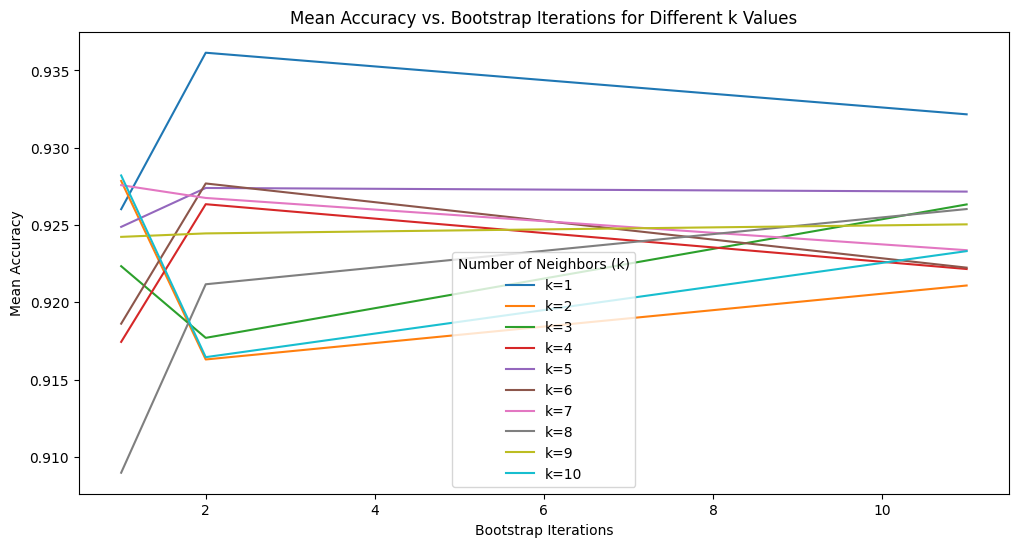

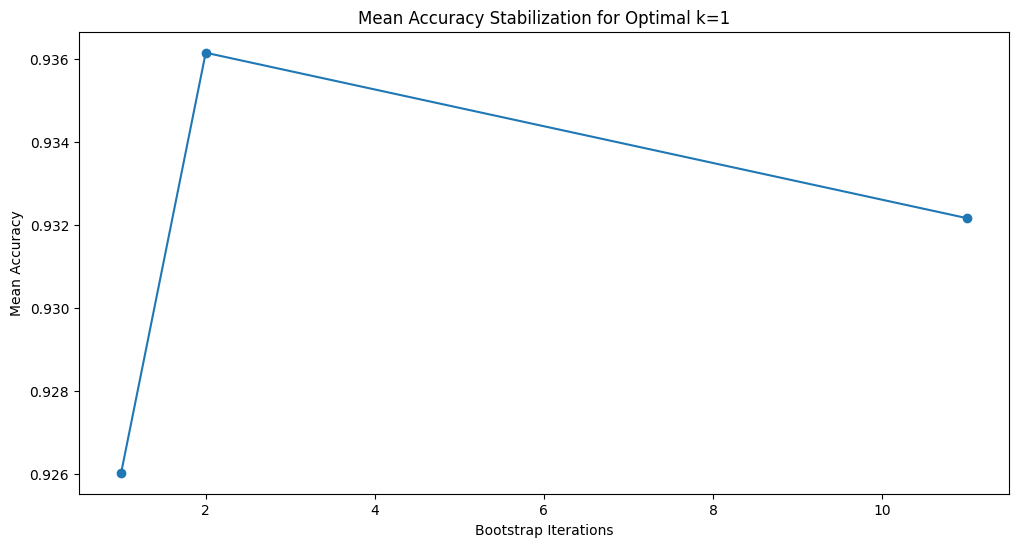

In [29]:
# Plotting
plt.figure(figsize=(12, 6))
for k, acc in results.items():
    plt.plot([iteration for iteration, _ in acc], [accuracy for _, accuracy in acc], label=f'k={k}')
plt.xlabel("Bootstrap Iterations")
plt.ylabel("Mean Accuracy")
plt.title("Mean Accuracy vs. Bootstrap Iterations for Different k Values")
plt.legend(title="Number of Neighbors (k)")
plt.show()

optimal_k = max(results, key=lambda k: max(results[k], key=lambda x: x[1])[1])
optimal_k_accuracies = results[optimal_k]

plt.figure(figsize=(12, 6))
plt.plot([iteration for iteration, _ in optimal_k_accuracies], [accuracy for _, accuracy in optimal_k_accuracies], marker='o')
plt.xlabel("Bootstrap Iterations")
plt.ylabel("Mean Accuracy")
plt.title(f"Mean Accuracy Stabilization for Optimal k={optimal_k}")
plt.show()